In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st

# Set path for crash data file
monroe_county_crash_path = "data/monroe-county-crash-data2003-to-2015.csv"

# Read the crash data 
df = pd.read_csv(monroe_county_crash_path, encoding="ISO-8859-1")

# Display the data table for preview
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [31]:
# Here are all the column names if you need to copy/paste.
print(df.columns)

# Here are all the data types.
print(df.dtypes)

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude'],
      dtype='object')
Master Record Number      int64
Year                      int64
Month                     int64
Day                       int64
Weekend?                 object
Hour                    float64
Collision Type           object
Injury Type              object
Primary Factor           object
Reported_Location        object
Latitude                float64
Longitude               float64
dtype: object


# Data Cleaning

#### Please take detailed notes of any issues that occur during your exploration, and we can clean the data up collectively when we gather next.  

In [32]:
# Data cleaning work will be placed in this cell. Please hold on this aspect. 
# Chris Question 4
# counting the values 
df.isnull().sum()

Master Record Number       0
Year                       0
Month                      0
Day                        0
Weekend?                  68
Hour                     225
Collision Type             6
Injury Type                0
Primary Factor          1121
Reported_Location         35
Latitude                  30
Longitude                 30
dtype: int64

In [33]:
collisioncount = df["Collision Type"]. value_counts()

In [34]:
df1=df.dropna(axis=0,subset = ["Collision Type"]) 

In [61]:
injury_count=df1["Injury Type"].value_counts()
injury_count.index

Index(['No injury/unknown', 'Non-incapacitating', 'Incapacitating', 'Fatal'], dtype='object')

In [62]:
collision_count=df1["Collision Type"].value_counts()
collision_count

2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Name: Collision Type, dtype: int64

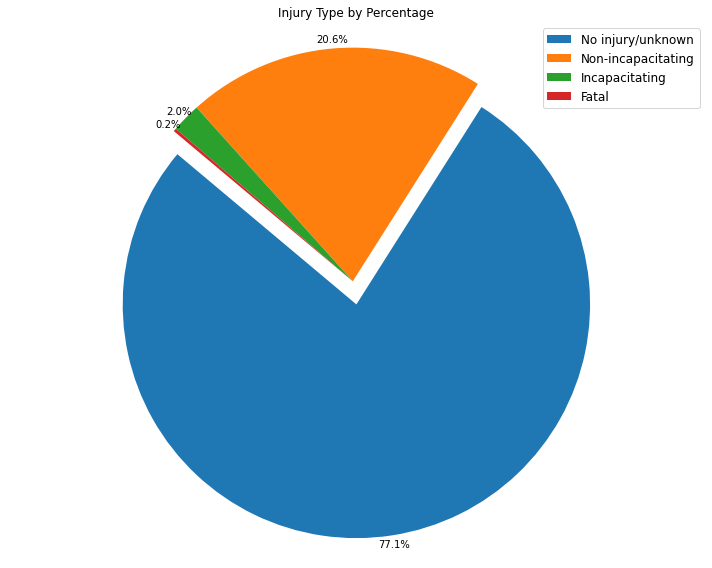

In [77]:
explode = (0.1, 0, 0, 0,)
injury_count.plot(kind="pie", explode= explode, autopct="%1.1f%%", pctdistance=1.04,labels=["","","","",""], shadow=False, startangle=140, figsize = (10,8))
plt.axis("equal");
plt.ylabel("")
plt.title("Injury Type by Percentage")
plt.legend(labels=injury_count.index, fontsize = 12) 
plt.tight_layout()

In [38]:
df2=df[["Collision Type","Injury Type"]]

In [39]:
no_injuries = df[df["Injury Type"] == "No injury/unknown"]
no_injuries.head()


,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
5,902364664,2015,1,6,Weekday,1800.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BURKS & WALNUT,39.126670,-86.531370
6,902364682,2015,1,6,Weekday,1200.0,2-Car,No injury/unknown,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,SOUTH CURRY PIKE LOT 71,39.150825,-86.584899


In [40]:
no_injuries = no_injuries[["Injury Type", "Collision Type"]]

#no_injuries = pd.DataFrame({
 #   "No Injury/Unknown Collision Types": no_injuries["Collision Type"].value_counts()})
no_injuries.head()


,Injury Type,Collision Type
0,No injury/unknown,2-Car
1,No injury/unknown,2-Car
4,No injury/unknown,2-Car
5,No injury/unknown,2-Car
6,No injury/unknown,2-Car


In [41]:
no_injuries2 = pd.DataFrame({
    "Collision Type" : no_injuries["Collision Type"].value_counts()
})

# Set x and y values 
x_values = list(no_injuries2.index)
y_values = no_injuries2["Collision Type"].to_list()
y_values

[30807, 7854, 1855, 758, 213, 61, 49]

Text(0.5, 1.0, 'Collision Type for No Injury')

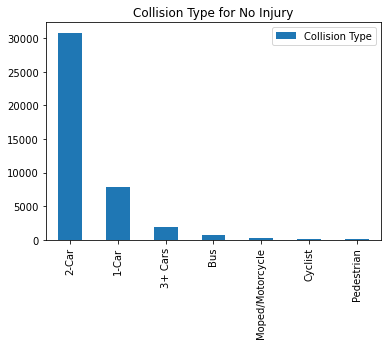

In [42]:
no_injuries2.plot(kind='bar')
plt.title("Collision Type for No Injury" )

In [ ]:
# Your work here 


# Tosha: In case it is helpful, I've provided a framework for one way your section could be approached. 
# 1) Filter df for fatal accidents in Injury Type. Perhaps like fatal_df = df[df["Injury Type"] == "Fatal"]

# 2) Count weekend and weekday accidents using Weekend? column. Perhaps you can use .value_counts() on Weekend? to get y-values?

# 3) Place this .value_counts() named variable into a data frame, using pd.DataFrame

# 4) Put these values into a pie chart. If you use df.plot(kind="pie"...etc), you can then plot this data frame into a pie chart. 

# 5) plt.show()

# 6) Repeat steps 2-5 using the Hour column instead of Weekend?. You might utilize binning here with two categories and then using pd.cut. 
# Note: Going from midnight-noon (AM) and noon-midnight (PM) may not be fruitful. We could consider making a morning-early evening bin and late evening-early morning bin (daytime vs. nighttime)  
 